# Assignment 7
### Programmed By Sravanth Chowdary Potluri

1. Download any Multi Dimensional Classification Dataset from UCI repository.
2. Ignore the class labels and perform Clustering.
3. Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
4. Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

In [8]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# load the dataset from bank.csv with seperator as ;
df = pd.read_csv('bank.csv', sep=';')

In [10]:
# print the first 5 rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
# removing the categorical columns
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y'], axis=1)

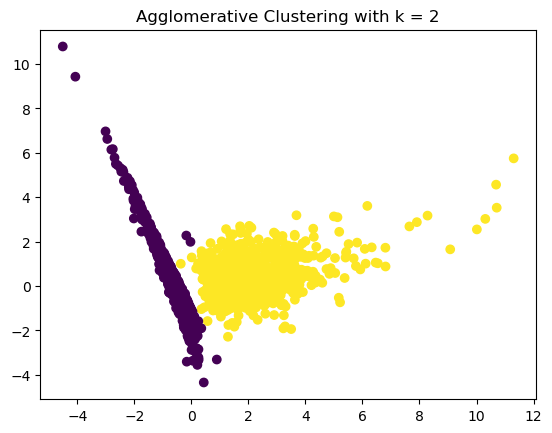

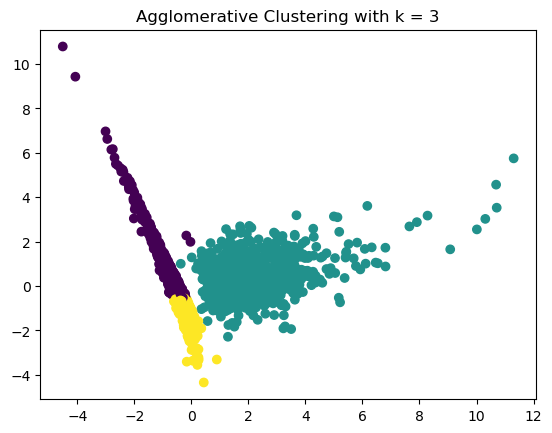

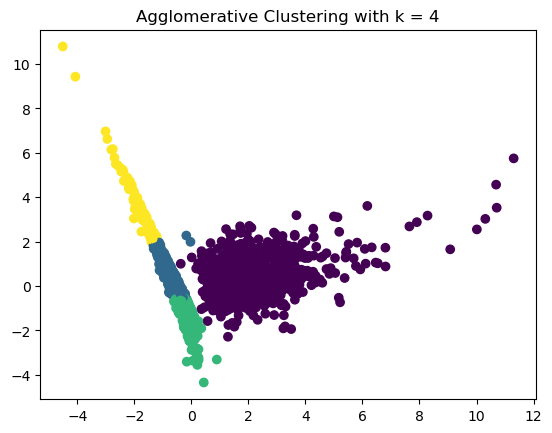

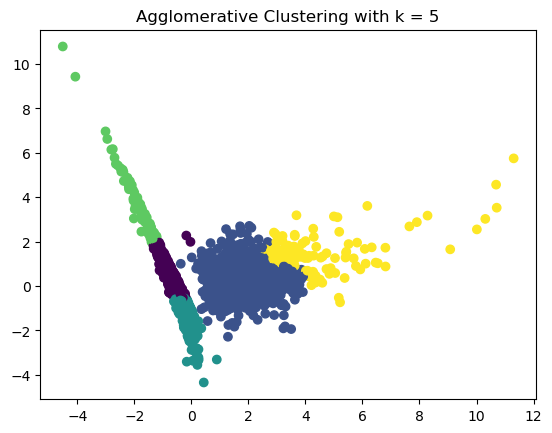

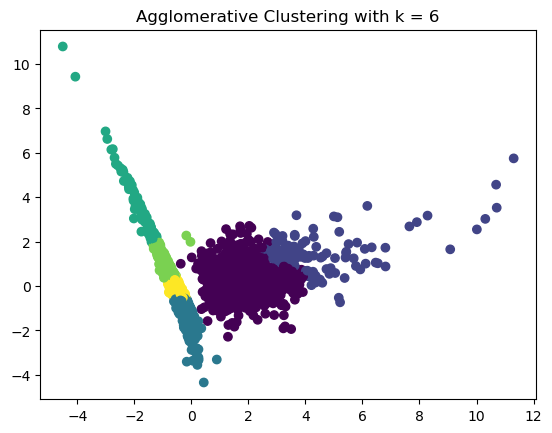

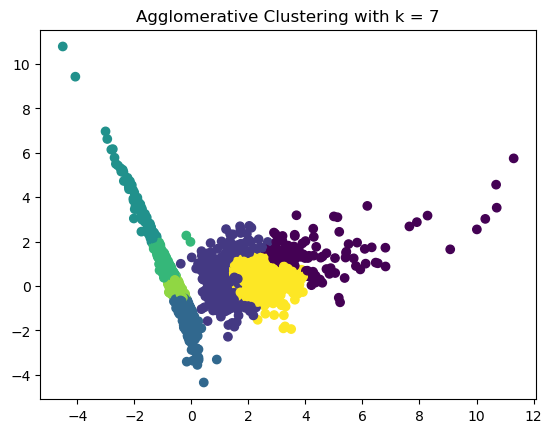

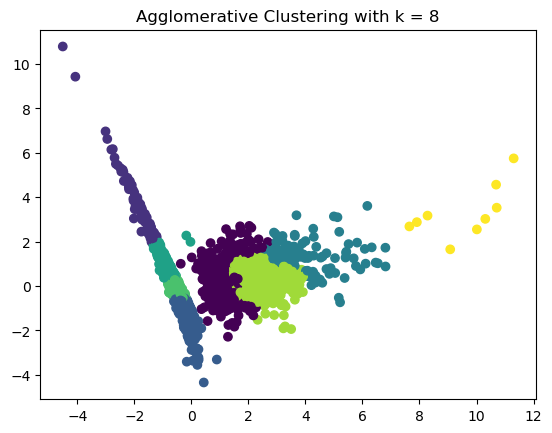

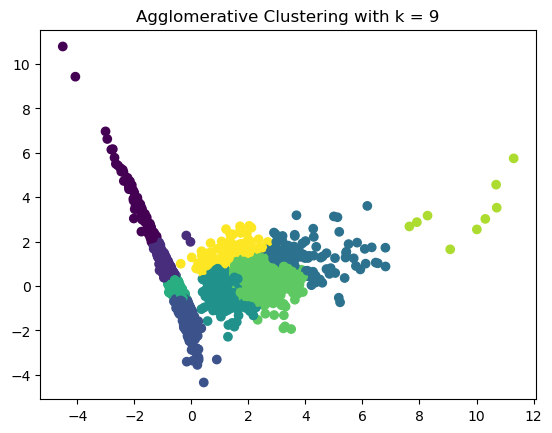

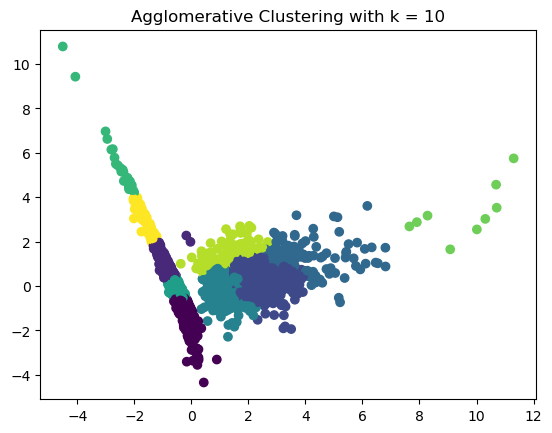

In [12]:
#Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
# Performing Aglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

req_k_values = [2,3, 4, 5, 6, 7, 8, 9, 10]
agglo_labels = []

# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# performing PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# performing agglomerative clustering and plotting the clusters
for k in req_k_values:
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo.fit(pca_data)
    agglo_labels.append(agglo.labels_)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo.labels_)
    plt.title('Agglomerative Clustering with k = {}'.format(k))
    plt.show()

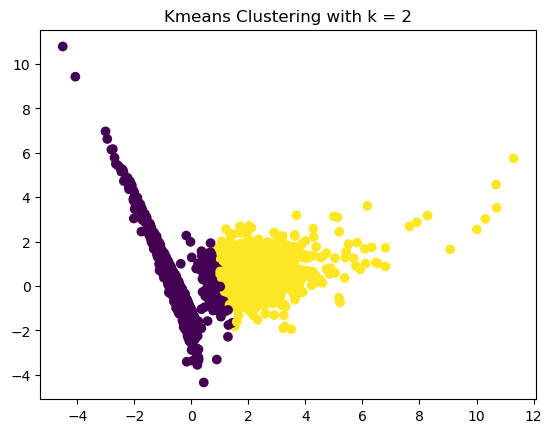

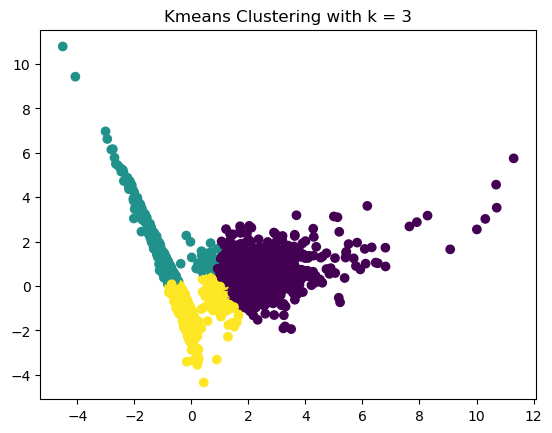

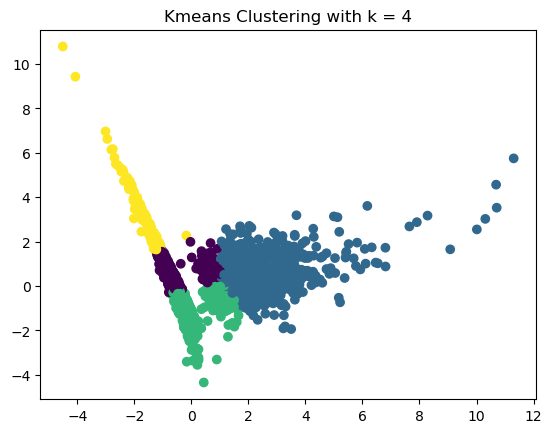

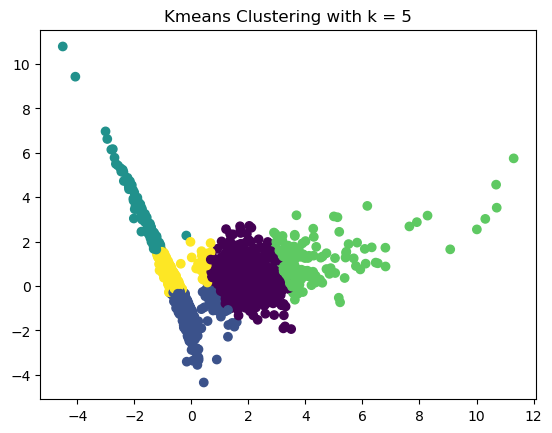

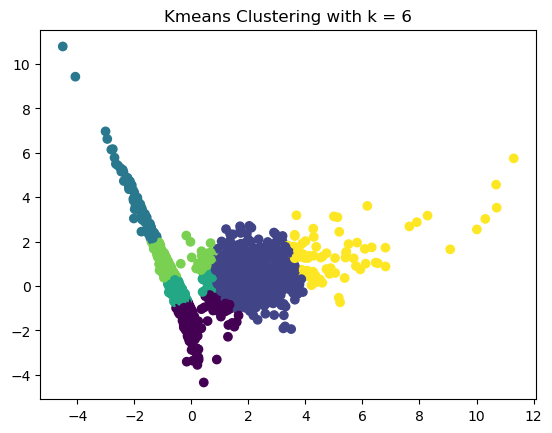

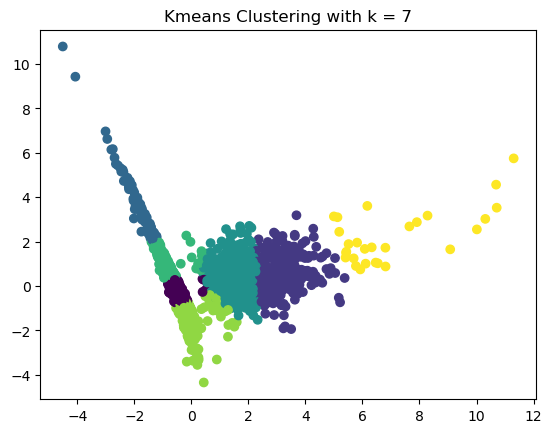

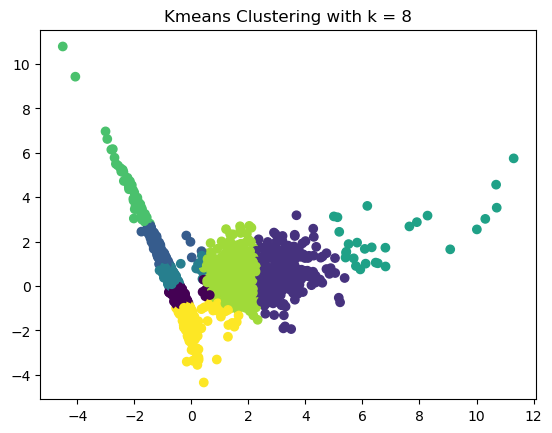

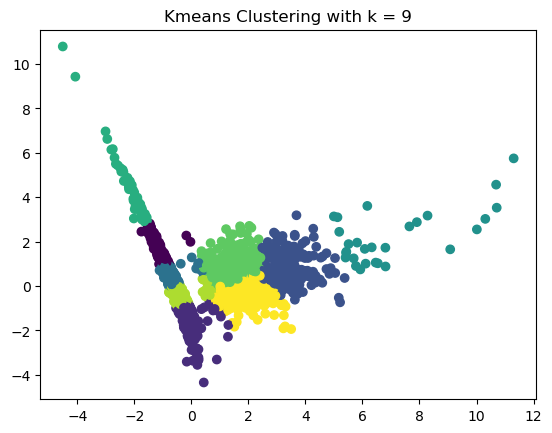

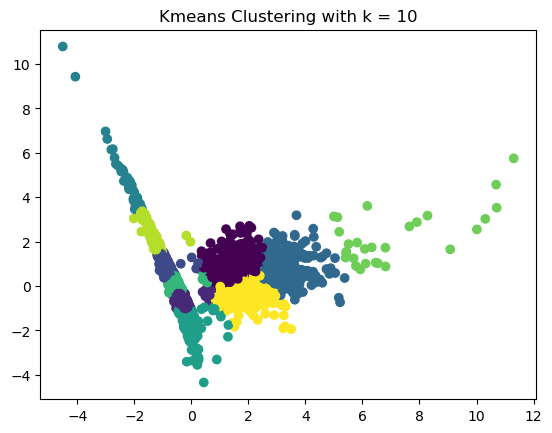

In [13]:
# Performing Kmeans Clustering
from sklearn.cluster import KMeans
kmeans_labels = []
sse=[]

# performing kmeans clustering and plotting the clusters
for k in req_k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    kmeans_labels.append(kmeans.labels_)
    sse.append(kmeans.inertia_)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_)
    plt.title('Kmeans Clustering with k = {}'.format(k))
    plt.show()

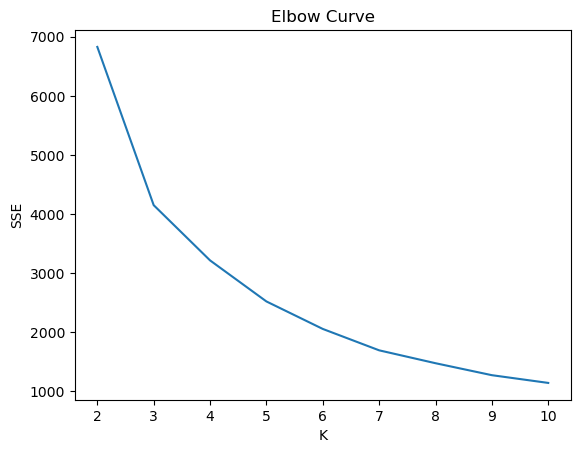

In [17]:
# plotting the elbow curve
plt.plot(req_k_values, sse)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

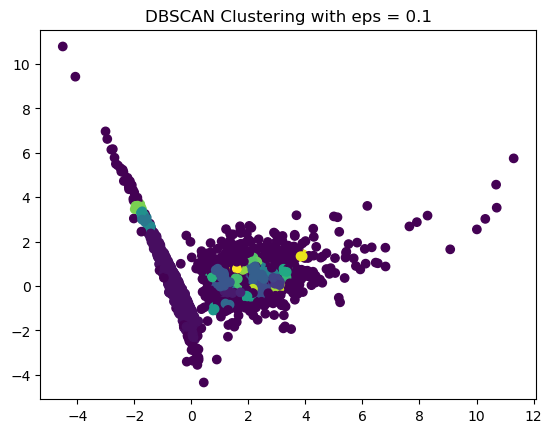

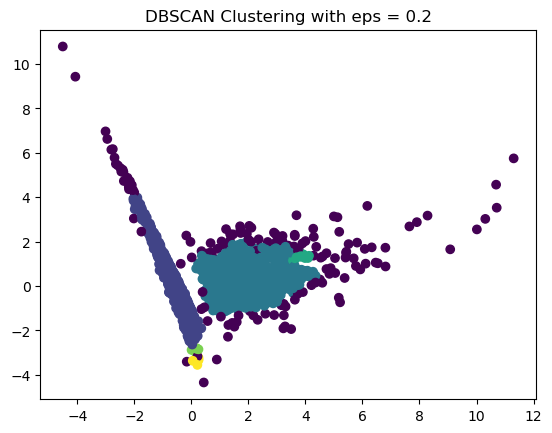

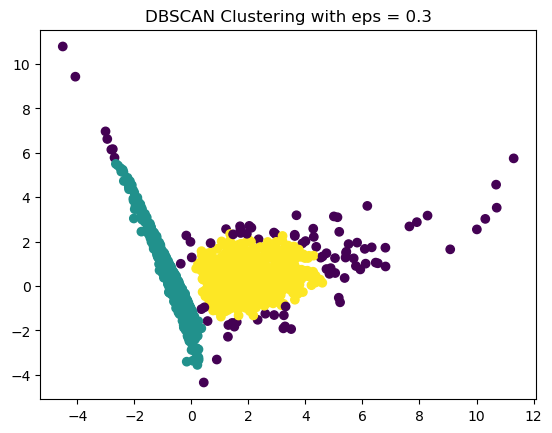

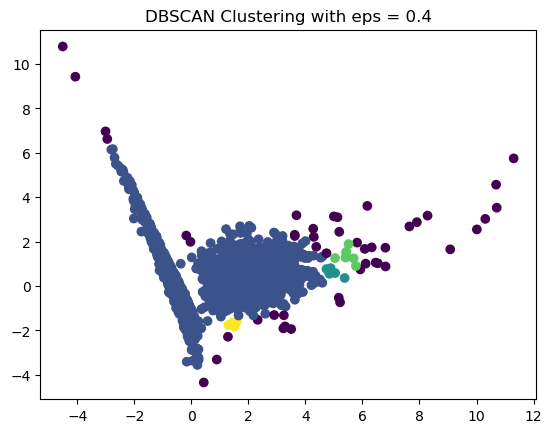

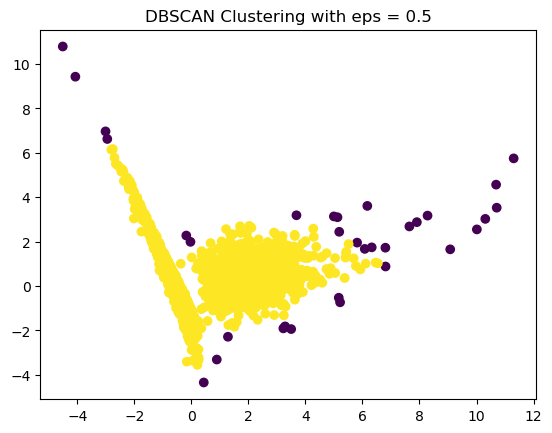

In [14]:
# Performing DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan_labels = []

# performing DBSCAN clustering and plotting the clusters
for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(pca_data)
    dbscan_labels.append(dbscan.labels_)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan.labels_)
    plt.title('DBSCAN Clustering with eps = {}'.format(eps))
    plt.show()

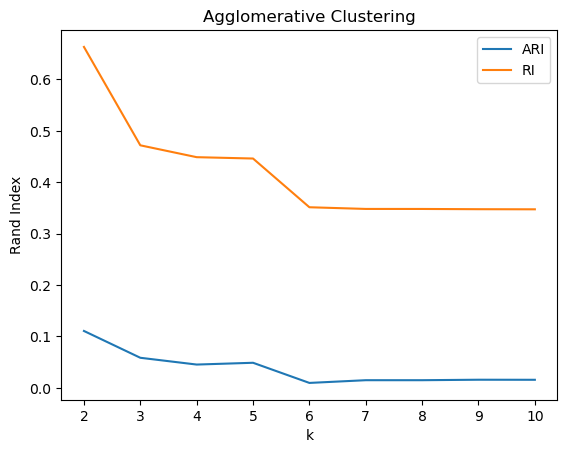

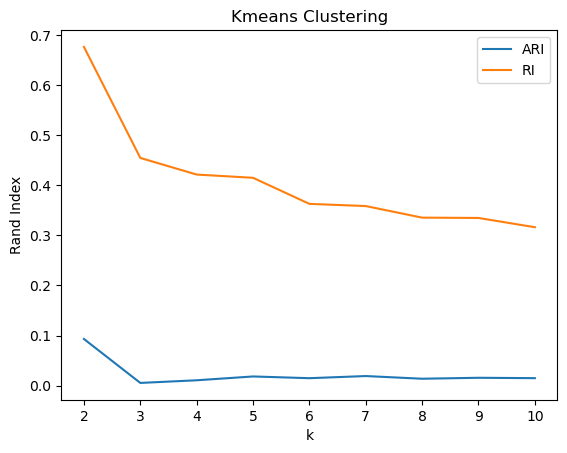

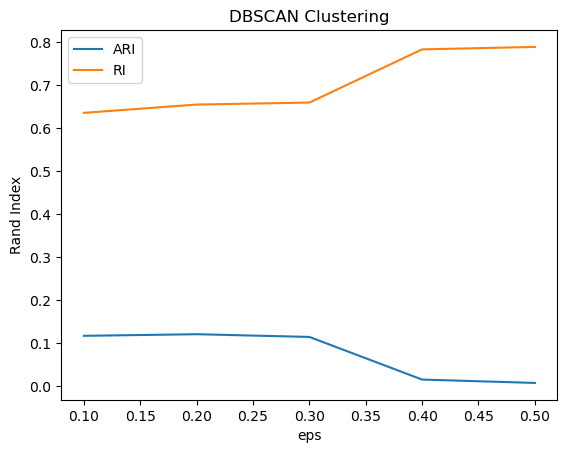

In [16]:
# Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

# importing the metrics
from sklearn.metrics import adjusted_rand_score, rand_score

ground_truth = pd.read_csv('bank.csv', sep=';')['y']
ground_truth = ground_truth.replace(['yes', 'no'], [1, 0])

# calculating the rand index and adjusted rand index for agglomerative clustering
agglo_ari = []
agglo_ri = []
for i in range(len(agglo_labels)):
    agglo_ari.append(adjusted_rand_score(ground_truth, agglo_labels[i]))
    agglo_ri.append(rand_score(ground_truth, agglo_labels[i]))

# calculating the rand index and adjusted rand index for kmeans clustering
kmeans_ari = []
kmeans_ri = []
for i in range(len(kmeans_labels)):
    kmeans_ari.append(adjusted_rand_score(ground_truth, kmeans_labels[i]))
    kmeans_ri.append(rand_score(ground_truth, kmeans_labels[i]))

# calculating the rand index and adjusted rand index for dbscan clustering
dbscan_ari = []
dbscan_ri = []
for i in range(len(dbscan_labels)):
    dbscan_ari.append(adjusted_rand_score(ground_truth, dbscan_labels[i]))
    dbscan_ri.append(rand_score(ground_truth, dbscan_labels[i]))

# plotting the rand index and adjusted rand index for agglomerative clustering
plt.plot(req_k_values, agglo_ari, label='ARI')
plt.plot(req_k_values, agglo_ri, label='RI')
plt.title('Agglomerative Clustering')
plt.xlabel('k')
plt.ylabel('Rand Index')
plt.legend()
plt.show()

# plotting the rand index and adjusted rand index for kmeans clustering
plt.plot(req_k_values, kmeans_ari, label='ARI')
plt.plot(req_k_values, kmeans_ri, label='RI')
plt.title('Kmeans Clustering')
plt.xlabel('k')
plt.ylabel('Rand Index')
plt.legend()
plt.show()

# plotting the rand index and adjusted rand index for dbscan clustering
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], dbscan_ari, label='ARI')
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], dbscan_ri, label='RI')
plt.title('DBSCAN Clustering')
plt.xlabel('eps')
plt.ylabel('Rand Index')
plt.legend()
plt.show()